In [1]:
import os
import rootpath
import sys
sys.path.append(rootpath.detect())

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from figure_utilities import *

In [4]:
from testsuite.analysis_tools import get_target_dict, get_igd_refpoint_dict
from testsuite.utilities import PROBLEM_CONFIGURATIONS, dominates

In [5]:
format_figures()

In [6]:
D_targets = get_target_dict()
D_rp = get_igd_refpoint_dict()

In [7]:
problem = PROBLEM_CONFIGURATIONS[15]
problem

'wfg6_2obj_6dim'

In [8]:
targets = D_targets[problem]
rp = D_rp[problem]

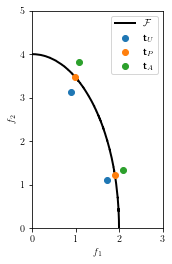

In [9]:
fig = plt.figure(figsize=[(3/5)*4, 4])
fig_ax = fig.gca()

fig_ax.axis("scaled")
fig_ax.set_xlabel(Symbols.function_n(1))
fig_ax.set_ylabel(Symbols.function_n(2))

fig_ax.plot(*rp[np.argsort(rp[:,0])].T, **Styles.line_Pareto_front, label=Symbols.Pareto_front, zorder=1)
fig_ax.scatter(*targets[::3].T, label=Symbols.target+"$_U$", zorder=2)
fig_ax.scatter(*targets[1::3].T, label=Symbols.target+"$_P$", zorder=3)
fig_ax.scatter(*targets[2::3].T, label=Symbols.target+"$_A$", zorder=4)
fig_ax.set_xlim(0, 3)
fig_ax.set_ylim(0, 5) 
fig_ax.legend()

In [10]:
# save_fig(fig, filename="fig_target_positions_wfg6_2obj")

In [11]:
t1 = targets[0]
t1_rp = np.vstack([i for i in rp if dominates(t1, i)])
t1_rp.shape

(356, 2)

In [12]:
t2 = targets[5]
t2_rp = np.vstack([i for i in rp if dominates(i, t2)])
t2_rp.shape

(372, 2)

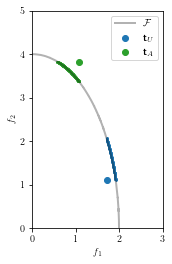

In [13]:
fig_rp = plt.figure(figsize=[(3/5)*4, 4])
fig_rp_ax = fig_rp.gca()

fig_rp_ax.axis("scaled")
fig_rp_ax.set_xlabel(Symbols.function_n(1))
fig_rp_ax.set_ylabel(Symbols.function_n(2))

fig_rp_ax.plot(*rp[np.argsort(rp[:,0])].T, **Styles.line_Pareto_front, label=Symbols.Pareto_front, alpha=0.3)

fig_rp_ax.scatter(*t1, c="C0", label=Symbols.target+"$_U$")
fig_rp_ax.scatter(*t1_rp.T, c="C0", s=2)

fig_rp_ax.scatter(*t2, c="C2", label=Symbols.target+"$_A$")
fig_rp_ax.scatter(*t2_rp.T, c="C2", s=2)

fig_rp_ax.set_xlim(0, 3)
fig_rp_ax.set_ylim(0, 5) 
fig_rp_ax.legend()

In [14]:
# save_fig(fig_rp, filename="fig_target_rp_wfg6_2obj")